In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Implementação do Perceptron

In [2]:
### Esse Perceptron é baseado na versão apresentada no livro  Python Machine Learning de Sebastian Raschka e Vahid Mirjalili , 
### com algumas modificações para a tarefa apresentada.
class Perceptron(object):
    def __init__(self,eta = 1.0,niter = 10000,up = 1, down = 0):
        self.eta = eta  #Taxa de aprendizagem
        self.niter = niter 
        self.up = up
        self.down = down
        
    def fit(self,X,y,w = []):
        self.w = w
        if len(self.w)==0:
            self.w = np.random.rand(1 + X.shape[1])
            self.init_w = self.w.copy()
        self.errors = []
        
        for i in range (self.niter):
            iter_error = 0
            old_w = self.w.copy()
            for xi,yi in zip(X,y):
                update = self.eta * (yi - self.predict(xi))
                self.w[1:] += update * xi
                self.w[0] += update
                iter_error += int(update != 0)
            self.errors.append(iter_error)
            if (self.w == old_w).all():
                self.niter = i
                break
            
        return self
    
    def net_input(self,x):
        return np.dot(x,self.w[1:]) + self.w[0]

    def predict(self,x):
        #Define a função :
        y_ = self.net_input(x)
        return np.where(y_ <=0,self.down,self.up)
        

#### Questão 1:
##### Utilizar o perceptron para análisar as classes de pureza P1 e P2 de um determinado óleo derivado do petróleo através de uma aprendizagem supervisionada.
#### g = { 0, u <=0 ; 1, u > 0

##### Carrega o dataset com a lib pandas e mostra os 5 primeiros elementos dele.

In [3]:
dataset = pd.read_excel('Tabela.xls')
dataset.head(5)

,x1,x2,x3,d
0,-0.6508,0.1097,4.0009,-1
1,-1.4492,0.8896,4.4005,-1
2,2.0850,0.6876,12.0710,-1
3,0.2626,1.1476,7.7985,1
4,0.6418,1.0234,7.0427,1


##### Extrai as colunas de input e os labels

In [4]:
data = np.array(dataset)
inputs = data[:,0:3]
labels = data[:,3]

##### Inicializa o perceptron com os dados da questão, taxa de aprendizado = 0.01 e classes P1 e P2 = 1 e -1

In [5]:
percep = Perceptron(eta = 0.01,up = 1,down = -1)

##### Passa os valores de entrada e os labels pela rede e mostra os pesos

In [6]:
percep.fit(inputs,labels)

In [7]:
pesos = percep.w
print('Pesos iniciais:', percep.init_w)
print('Pesos wbias,w1,w2,w3:',pesos)
print('Numero de epocas:',percep.niter)

Pesos iniciais: [0.27850623 0.25409259 0.19300052 0.71837473]
Pesos wbias,w1,w2,w3: [ 3.01850623  1.46490659  2.44861452 -0.72123527]
Numero de epocas: 375


##### Calculo da acurácia do modelo obtido

In [8]:
### Função para cálculo da acurácia
def model_score(X_test,y_test,perceptron):
    y_test = np.array(y_test)
    y_predict = perceptron.predict(X_test)
    total_lb = len(y_test)
    
    equal_lb, = np.where(y_test==y_predict)
    equal_lb = len(equal_lb)
    score = equal_lb/total_lb
    return score

In [9]:
score = model_score(inputs,labels,percep)
print('Acurracy:', score*100 , '%')

Acurracy: 100.0 %


##### Como esperado é obtido 100% de acurácia utilizando o próprio dataset de treino como dataset de teste

##### Note que como não é passo nenhum argumento em w na função fit os pesos são utilizados aleatoriamente utilizando a função random.rand do numpy. 
##### Assim é realizada as 4 novas iterações e mostrados seus respectivos pesos


In [10]:
percep1 = Perceptron(eta = 0.01,up = 1,down = -1)
percep1.fit(inputs,labels)
pesos1 = percep1.w
score1 = model_score(inputs,labels,percep1)

print('Pesos iniciais:', percep1.init_w)
print('Pesos wbias,w1,w2,w3:',pesos1)
print('Acurracy:', score1*100 , '%')
print('Numero de epocas:',percep1.niter)

Pesos iniciais: [0.70163907 0.43579001 0.20054082 0.35060032]
Pesos wbias,w1,w2,w3: [ 3.10163907  1.57044201  2.48939482 -0.73920368]
Acurracy: 100.0 %
Numero de epocas: 394


In [11]:
percep2 = Perceptron(eta = 0.01,up = 1,down = -1)
percep2.fit(inputs,labels)
pesos2 = percep2.w
score2 = model_score(inputs,labels,percep2)

print('Pesos iniciais:', percep2.init_w)
print('Pesos wbias,w1,w2,w3:',pesos2)
print('Acurracy:', score2*100 , '%')
print('Numero de epocas:',percep2.niter)

Pesos iniciais: [0.36904468 0.71614553 0.52346204 0.44159716]
Pesos wbias,w1,w2,w3: [ 3.06904468  1.55747753  2.45811604 -0.73108684]
Acurracy: 100.0 %
Numero de epocas: 373


In [12]:
percep3 = Perceptron(eta = 0.01,up = 1,down = -1)
percep3.fit(inputs,labels)
pesos3 = percep3.w
score3 = model_score(inputs,labels,percep3)

print('Pesos iniciais:', percep3.init_w)
print('Pesos wbias,w1,w2,w3:',pesos3)
print('Acurracy:', score3*100 , '%')
print('Numero de epocas:',percep3.niter)

Pesos iniciais: [0.66311448 0.14533897 0.26623876 0.70269676]
Pesos wbias,w1,w2,w3: [ 3.04311448  1.52766897  2.47119076 -0.72672724]
Acurracy: 100.0 %
Numero de epocas: 375


In [13]:
percep4 = Perceptron(eta = 0.01,up = 1,down = -1)
percep4.fit(inputs,labels)
pesos4 = percep4.w
score4 = model_score(inputs,labels,percep4)

print('Pesos iniciais:', percep4.init_w)
print('Pesos wbias,w1,w2,w3:',pesos4)
print('Acurracy:', score4*100 , '%')
print('Numero de epocas:',percep4.niter)

Pesos iniciais: [0.60510873 0.62418441 0.34275902 0.72833426]
Pesos wbias,w1,w2,w3: [ 2.88510873  1.41593241  2.37244102 -0.67183174]
Acurracy: 100.0 %
Numero de epocas: 309


##### Questão 2: Registrar os Resultados dos treinamentos

In [15]:
print('Treinamento 0:')
print('Pesos iniciais:', percep.init_w)
print('Pesos wbias,w1,w2,w3:',pesos)
print('Acurracy:', score*100 , '%')
print('Numero de epocas:',percep.niter)
print('--------------------------------------------------------')

print('Treinamento 1:')
print('Pesos iniciais:', percep1.init_w)
print('Pesos wbias,w1,w2,w3:',pesos1)
print('Acurracy:', score1*100 , '%')
print('Numero de epocas:',percep1.niter)
print('--------------------------------------------------------')

print('Treinamento 2:')
print('Pesos iniciais:', percep2.init_w)
print('Pesos wbias,w1,w2,w3:',pesos2)
print('Acurracy:', score2*100 , '%')
print('Numero de epocas:',percep2.niter)
print('--------------------------------------------------------')

print('Treinamento 3:')
print('Pesos iniciais:', percep3.init_w)
print('Pesos wbias,w1,w2,w3:',pesos3)
print('Acurracy:', score3*100 , '%')
print('Numero de epocas:',percep3.niter)
print('--------------------------------------------------------')

print('Treinamento 4:')
print('Pesos iniciais:', percep4.init_w)
print('Pesos wbias,w1,w2,w3:',pesos4)
print('Acurracy:', score4*100 , '%')
print('Numero de epocas:',percep4.niter)


Treinamento 0:
Pesos iniciais: [0.27850623 0.25409259 0.19300052 0.71837473]
Pesos wbias,w1,w2,w3: [ 3.01850623  1.46490659  2.44861452 -0.72123527]
Acurracy: 100.0 %
Numero de epocas: 375
--------------------------------------------------------
Treinamento 1:
Pesos iniciais: [0.70163907 0.43579001 0.20054082 0.35060032]
Pesos wbias,w1,w2,w3: [ 3.10163907  1.57044201  2.48939482 -0.73920368]
Acurracy: 100.0 %
Numero de epocas: 394
--------------------------------------------------------
Treinamento 2:
Pesos iniciais: [0.36904468 0.71614553 0.52346204 0.44159716]
Pesos wbias,w1,w2,w3: [ 3.06904468  1.55747753  2.45811604 -0.73108684]
Acurracy: 100.0 %
Numero de epocas: 373
--------------------------------------------------------
Treinamento 3:
Pesos iniciais: [0.66311448 0.14533897 0.26623876 0.70269676]
Pesos wbias,w1,w2,w3: [ 3.04311448  1.52766897  2.47119076 -0.72672724]
Acurracy: 100.0 %
Numero de epocas: 375
--------------------------------------------------------
Treinamento 4:
P

##### Questão 3: Analisar os resultados para as amostras de óleo da Tabela abaixo
|Amostra|x1|x2|x3|y(t1)|y(t2)|y(t3)|y(t4)|yt(5)|
|-|-|-|-|-|-|-|-|-|
|A1|-0,3665|0,0620|5,9891||||||
|A2|-0,7842|1,1267|5,5912||||||
|A3|0,3012|0,5611|5,8234||||||
|A4|0,7757|1,0648|8,0677||||||
|A5|0,1570|0,8028|6,3040||||||
|A6|-0,7014|1,0316|3,6005||||||
|A7|0,3748|0,1536|6,1537||||||
|A8|-0,6920|0,9404|4,4058||||||
|A9|-1,3970|0,7141|4,9263||||||
|A10|-1,8842|0,2805|1,2548||||||

In [35]:
A =  np.array([[-0.3665,0.0620,5.9891],[-0.7842,1.1267,5.5912],[0.3012,0.5611,5.8234], [0.7757,1.0648,8.0677]
    ,[0.1570,0.8028,6.3040],[-0.7014,1.0316,3.600],[0.3748,0.1536,6.1537],[-0.6920,0.9404,4.4058],
    [-1.3970,0.7141,4.9263],[-1.8842,0.2805,1.2548]])
A

array([[-0.3665,  0.062 ,  5.9891],
       [-0.7842,  1.1267,  5.5912],
       [ 0.3012,  0.5611,  5.8234],
       [ 0.7757,  1.0648,  8.0677],
       [ 0.157 ,  0.8028,  6.304 ],
       [-0.7014,  1.0316,  3.6   ],
       [ 0.3748,  0.1536,  6.1537],
       [-0.692 ,  0.9404,  4.4058],
       [-1.397 ,  0.7141,  4.9263],
       [-1.8842,  0.2805,  1.2548]])

In [38]:
print('y(t0):')
print(percep.predict(A))
print('------------------------------')

print('y(t1):')
print(percep1.predict(A))
print('------------------------------')

print('y(t2):')
print(percep2.predict(A))
print('------------------------------')

print('y(t3):')
print(percep3.predict(A))
print('------------------------------')

print('y(t4):')
print(percep4.predict(A))

y(t0):
[-1  1  1  1  1  1 -1  1 -1  1]
------------------------------
y(t1):
[-1  1  1  1  1  1 -1  1 -1 -1]
------------------------------
y(t2):
[-1  1  1  1  1  1 -1  1 -1 -1]
------------------------------
y(t3):
[-1  1  1  1  1  1 -1  1 -1 -1]
------------------------------
y(t4):
[-1  1  1  1  1  1 -1  1 -1  1]


##### Questão 4: Explicar porque o número de épocas varias a cada treinamento do perceptron.

###### R: O número de épocas varia devido aos diferentes valores utilizados na inicialização dos pesos. A consequência disso é que para alguns valores serão necessárias mais iterações para convergir.

##### Questão 5 : Para a aplicação, discutir se é possível afirmar que as classes são linearmente separáveis.

Text(0, 0.5, 'x3')

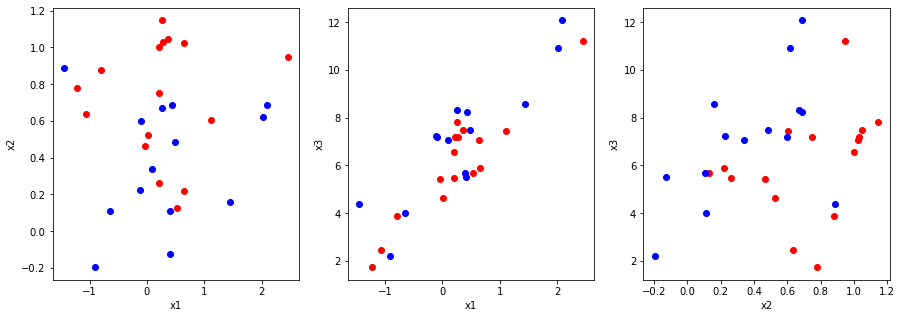

In [60]:
##### P1 = np.where(labels==1)
P2 = np.where(labels==-1)

XP1 = data[P1]
XP2 = data[P2]

plt.figure(figsize =(15,5))
plt.subplot(1,3,1)
plt.scatter(XP1[:,0],XP1[:,1],color = 'red', marker = 'o')
plt.scatter(XP2[:,0],XP2[:,1],color = 'blue', marker = 'o')
plt.xlabel('x1')
plt.ylabel('x2')

plt.subplot(1,3,2)
plt.scatter(XP1[:,0],XP1[:,2],color = 'red', marker = 'o')
plt.scatter(XP2[:,0],XP2[:,2],color = 'blue', marker = 'o')
plt.xlabel('x1')
plt.ylabel('x3')


plt.subplot(1,3,3)
plt.scatter(XP1[:,1],XP1[:,2],color = 'red', marker = 'o')
plt.scatter(XP2[:,1],XP2[:,2],color = 'blue', marker = 'o')
plt.xlabel('x2')
plt.ylabel('x3')

##### Como observado nos gráficos acima é difícil estabelecer uma reta que separe as classes assim apesar de o perceptron ser capaz de adaptar seus pesos para o conjunto de dados fornecidos é necessário um conjunto maior de dados para ser capaz de validar e afirmar que as classes são linearmente separáveis.